In [1]:
import pandas as pd  # dataframes for analysis
import numpy as np  # math on dataframes
import os  # getting files from computer
from os import path  # finding box directory
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # custom legends
import matplotlib.lines as lines  # custom legends
from matplotlib.gridspec import GridSpec  # more complex subplotting

In [2]:
# === File Paths ===
# inputFile = "/Users/pinnipedlab/Desktop/OutputNavyRhythm/Processed0417/allTapData.csv"
# outputFolder = "/Users/pinnipedlab/Desktop/OutputNavyRhythm/Processed0417/"
inputFile = 'D:\\Rouse\\My Documents\\GitHub\\RhythmGame\\AnalysisCode\\GameAnalysis\\Output\\allTapData.csv'

outputFolder = 'D:\\Rouse\\My Documents\\GitHub\\RhythmGame\\AnalysisCode\\GameAnalysis\\Output\\Figs'



In [3]:
# import numpy as np
# import pandas as pd
# import os

# === Utility Functions ===

def circ_mean(angles):
    angles = pd.to_numeric(angles, errors='coerce')
    angles = angles.dropna()
    if len(angles) == 0:
        return np.nan
    mean_sine = average_sin(angles)
    mean_cosine = average_cos(angles)
    return np.arctan2(mean_sine, mean_cosine)

def average_sin(angles):
    angles = pd.to_numeric(angles, errors='coerce').dropna()
    return np.mean(np.sin(angles)) if len(angles) > 0 else np.nan

def average_cos(angles):
    angles = pd.to_numeric(angles, errors='coerce').dropna()
    return np.mean(np.cos(angles)) if len(angles) > 0 else np.nan

def mvl(angles):
    angles = pd.to_numeric(angles, errors='coerce').dropna()
    if len(angles) == 0:
        return np.nan
    mean_sine = np.mean(np.sin(angles))
    mean_cosine = np.mean(np.cos(angles))
    return np.sqrt(mean_sine**2 + mean_cosine**2)

def safe_count(messages):
    return ((messages == 'Safe') | (messages == 'Hit') | (messages == 'Miss (already hit)')).sum()

def miss_count(messages):
    return (messages == 'Miss').sum()


def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    https://stackoverflow.com/questions/22562364/circular-polar-histogram-in-python
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=False, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [4]:
# === Load Data ===
allData = pd.read_csv(inputFile)

# Clean 'Angle' column
allData['Angle'] = allData['Angle'].replace('[nan]', np.nan).astype(float)

## Plot by session, user-specified

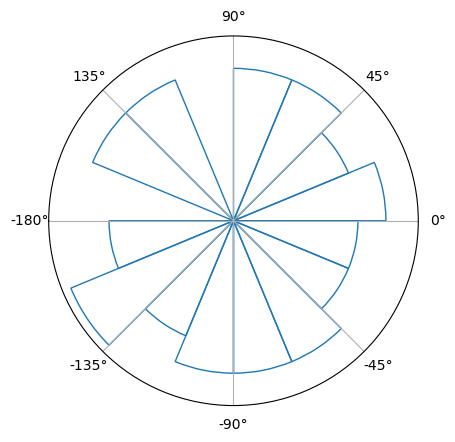

<Figure size 640x480 with 0 Axes>

In [132]:
currSession = 20
currSubject = "Ank"

subjectData = allData[allData['Subject'].str.contains(currSubject, case=False)]
sessionData = subjectData[subjectData['SessionNum'] == currSession]

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
ax.set_thetalim(-np.pi, np.pi)

if len(sessionData) > 0:
    
    
    # Visualise by area of bins
    circular_hist(ax, sessionData['Angle'], gaps=False)
    plt.show()
    plt.savefig(path.join(outputFolder, f'rose_{currSubject}_t{currSession}.png'), bbox_inches='tight', dpi=300, facecolor='white', transparent=False)
else:
    print("no trials in that session")

## Plot by session, all specimens and sessions

In [9]:

subjects = allData['Subject'].unique()

for currSubject in subjects:
    subjectData = allData[allData['Subject'].str.match(currSubject)]
    sessions = subjectData['SessionNum'].unique()
    for currSession in sessions:
        sessionData = subjectData[subjectData['SessionNum'] == currSession]
        if len(sessionData) > 0:
            # Visualise by area of bins
            fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
            ax.set_thetalim(-np.pi, np.pi)

            circular_hist(ax, sessionData['Angle'], gaps=False)
            # plt.show()

            plt.savefig(path.join(outputFolder, f'rose_{currSubject}_t{currSession}.png'), bbox_inches='tight', dpi=300, facecolor='white', transparent=False)
            plt.close()
        else:
            print('no trials for "{currSubject}" in session "{currSession}"')
print("Done")

Done


In [168]:
humanData = pd.Series([-0.695982098, -0.971321327, 1.963766904, 1.12936325, 0.574491808, 0.159386472, -0.115952757, 0.167772439, 0.171965422, 
             0.176158405, 0.040585282, 0.044778265, 0.328503461, 0.192930338, 0.197123321, 0.201316304, 0.065743181, 0.069936164, 
             -0.205403065, -0.340976188, -0.336783205, -0.053058009, -0.328397239, -0.324204255, 0.239053153, 0.383012242, -0.1718592, 
             -0.447198429, -0.443005446, 0.539550281, 0.264211052, -0.150894284, -0.286467407, -0.561806636, -0.697379759, 0.005643755, 
             0.149602845, -0.125736385, 0.018222705, -0.257116524, -0.252923541, -0.248730558, -0.244537575, 0.039187621, -0.096385502, 
             -0.231958625, -0.227765642, 0.055959554, -0.219379676, -0.354952799, -0.210993709, 0.072731486, 0.216690576, -0.058648654, 
             -0.194221777, 0.508801738, 0.652760827, 0.796719917, 0.661146794, 0.385807564, 0.110468335, -0.164870894, -0.160677911, 0.262813391])


fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
ax.set_thetalim(-np.pi, np.pi)
circular_hist(ax, humanData, gaps=False)
ax.set_rticks([0.1, .2, .3])  # Less radial ticks
ax.set_rlabel_position(100)  # Move radial labels away from plotted line
# plt.show()

plt.savefig(path.join(outputFolder, f'rose_human.png'), bbox_inches='tight', dpi=300, facecolor='white', transparent=False)
plt.close()